In [1]:
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics.pairwise import paired_distances
import matplotlib.ticker as ticker
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")

In [2]:
res_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results"
ours_path = os.path.join(res_path,"Supervision_SUM_image2D_Ours_20220627-183753")
unsuper_path = os.path.join(res_path,"Supervision_SUM_image2D_Baseline3_20220628-234659")
kd_path = os.path.join(res_path, "Supervision_SUM_image2D_KD_20220710-012753")

In [8]:
kdd_path = os.path.join(res_path,"Supervision_SUM_image2D_KD_20220629-152906")
kdd_csv_path = os.path.join(kdd_path,'metrics.csv')
kdd_df = pd.read_csv (kdd_csv_path, sep='\t')

In [9]:
kdd_df

,Unnamed: 0,train_cls_loss,train_npl_loss,train_kd_loss,train_dist_loss,test_cls_loss,test_kd_loss,test_dist_loss,test_npl_loss,test_pdist,test_cpdist,test_spdist,test_acc
0,0,1.900438,1.466072,1.889318,1.595303,2.493258,2.470122,1.596592,1.475185,1.046575,1.045856,0.299675,32.644628
1,1,1.702797,1.416630,1.691155,1.600726,1.801711,1.789434,1.592929,1.322148,1.050215,1.054820,0.291192,28.925620
2,2,1.537927,1.354631,1.531507,1.601635,1.306282,1.299449,1.603648,1.327892,1.049242,1.051325,0.299547,47.933884
3,3,1.392330,1.308927,1.387164,1.610304,1.674664,1.678765,1.607825,1.335970,1.049083,1.047340,0.285847,34.297521
4,4,1.316438,1.273419,1.313169,1.629306,2.129399,2.133574,1.632519,1.343125,1.051214,1.050341,0.304428,36.363636
5,5,1.242561,1.340436,1.237388,1.635532,1.454760,1.462473,1.638009,1.200969,1.052934,1.054195,0.306646,47.107438
6,6,1.289676,1.227707,1.289751,1.644817,1.334597,1.343104,1.636149,1.305130,1.054547,1.054084,0.265199,43.388430
7,7,1.179145,1.271925,1.177647,1.647528,1.123694,1.138870,1.659932,1.218996,1.059164,1.060267,0.322108,56.198347
8,8,0.957758,1.216800,0.959396,1.667048,0.928110,0.973339,1.679986,1.166827,1.062211,1.056326,0.329956,61.570248
9,9,0.840888,1.168528,0.846249,1.682049,1.146268,1.197933,1.678293,1.266031,1.063003,1.063135,0.338438,63.636364


In [3]:
ours_csv_path = os.path.join(ours_path,'metrics.csv')
ours_df = pd.read_csv (ours_csv_path, sep='\t')

unsuper_csv_path = os.path.join(unsuper_path,'metrics.csv')
unsuper_df = pd.read_csv (unsuper_csv_path, sep='\t')

kd_csv_path = os.path.join(kd_path,'metrics.csv')
kd_df = pd.read_csv (kd_csv_path, sep='\t')

kd_smap = np.load(os.path.join(kd_path,'smap.npy'))
kd_tmap = np.load(os.path.join(kd_path,'tmap.npy'))

In [4]:
our_test_acc =  np.asarray(ours_df['precision'])
our_dist_loss = np.asarray(ours_df['test_distance_loss'])
un_test_acc = np.asarray(unsuper_df['precision'])
un_dist_loss = np.asarray(unsuper_df['test_distance_loss'])
kd_test_acc = np.asarray(kd_df['test_acc'])
kd_dist_loss = np.asarray(kd_df['test_dist_loss'])
x = np.arange(1,51,1)
un_test_acc[47:] = un_test_acc[47:]-2


In [7]:
ours_df

,Unnamed: 0,train_loss,test_loss,precision,test_distance_loss,train_distance_loss
0,0,9.469779,2.549815,24.380165,1.355546,1.445579
1,1,8.483431,1.881200,42.561983,1.269707,1.325932
2,2,7.343245,1.849051,51.239669,1.111638,1.163556
3,3,6.467104,1.477113,50.413223,0.980185,1.002922
4,4,5.948506,1.604542,53.719008,0.863005,0.897868
5,5,5.266879,1.348661,55.785124,0.858043,0.763215
6,6,4.901293,1.298887,61.983471,0.752450,0.707567
7,7,4.496348,1.799184,58.677686,0.856337,0.643335
8,8,4.224176,1.222016,62.809917,0.724170,0.587795
9,9,3.727288,1.082083,67.768595,0.669831,0.527203


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
kd_path = os.path.join(res_path, 'Supervision_SUM_image2D_KD_20220710-200042')
kd_dist = []

for i in range(50):
    kd_smap= np.load(os.path.join(kd_path,'smap_{}.npy'.format(i)))
    kd_smap = kd_smap/np.max(kd_smap)

    
    kd_tmap= np.load(os.path.join(kd_path,'tmap_{}.npy'.format(i)))
    kd_tmap = kd_tmap.reshape((242, 30,512,7,7))
    kd_tmap = np.apply_over_axes(np.mean, kd_tmap, [1,3,4])
    kd_tmap = np.squeeze(kd_tmap)
    kd_tmap = kd_tmap/np.max(kd_tmap)

    kd_pca = pca.fit_transform(kd_smap)
    img_pca = pca.fit_transform(kd_tmap)
    pdist = paired_distances(kd_pca, img_pca)
    dist = np.mean(pdist)
    kd_dist.append(dist)
    
kd_loss = np.asarray(kd_dist)

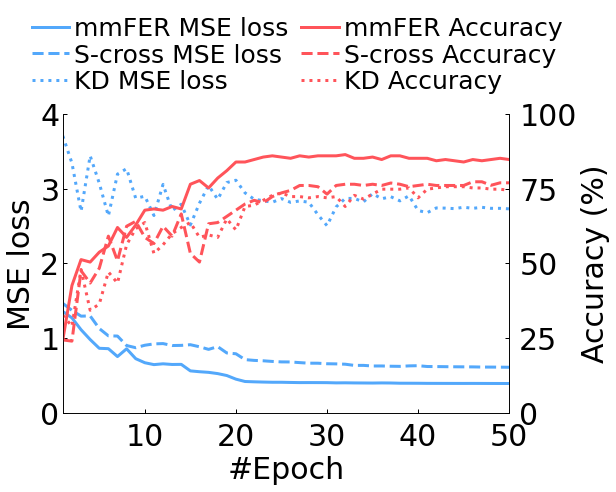

In [7]:
# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5))
ax2 = ax.twinx()
ax.set_facecolor("none")
ax2.set_facecolor("none")

l = ['mmFER', 'S-cross', 'Keypoint', 'KD']


lw = 3

ax.plot(x, our_dist_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} MSE loss'.format(l[0]), linewidth=lw)


ax.plot(x, un_dist_loss, color=colors[0], linestyle='dashed',
        fillstyle='none', label='{} MSE loss'.format(l[1]), linewidth=lw)


ax.plot(x, kd_loss, color=colors[0], linestyle='dotted',
        fillstyle='none', label='{} MSE loss'.format(l[3]), linewidth=lw)


ax2.plot(x, our_test_acc, color=colors[5],  linestyle='solid',
         label='{} Accuracy'.format(l[0]), linewidth=lw)

ax2.plot(x, un_test_acc, color=colors[5],  linestyle='dashed',
         label='{} Accuracy'.format(l[1]), linewidth=lw)

ax2.plot(x, kd_test_acc, color=colors[5],  linestyle='dotted',
         label='{} Accuracy'.format(l[3]), linewidth=lw)
# ax.set_yscale('log', base=1.1)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# ax2.axhline(y = y, color=colors[2], linewidth=lw)


ax.set_ylabel("MSE loss", fontsize=30)
ax.set_xlabel("#Epoch", fontsize=30)
ax2.set_ylabel("Accuracy (%)", fontsize=30)

ax.set_xlim(1, 50)
ax2.set_xlim(1, 50)
handles, labels = ax.get_legend_handles_labels()
new_handles, new_labels = ax2.get_legend_handles_labels()
H = handles + new_handles
L = labels + new_labels
ax.set_ylim(0,4)


# L, H = zip(*sorted(zip(L, H), key=lambda t: t[0]))

# L = np.asarray(L)
# H = np.asarray(H)
# temp = L[-1]
# L[-1] = L[0]
# L[0] = temp

# temp = H[-1]
# H[-1] = H[0]
# H[0] = temp

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax2.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.set_ylim(0, 100)

ax.legend(H, L, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.12, 1.4), fancybox=True,
               framealpha=0.0, labelspacing=0.1, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/Fig14b.svg',format='svg', bbox_inches="tight")


In [129]:
print('Our mse loss:{:.2f}'.format(our_dist_loss[-1]))
print('S-cross mse loss:{:.2f}'.format(un_dist_loss[-1]))
print('KD mse loss:{:.2f}'.format(kd_loss[-1]))


print('Our accuracy :{:.2f}'.format( np.max(our_test_acc)))
print('S-cross accuracy :{:.2f}'.format(np.max(un_test_acc)))
print('KD accuracy :{:.2f}'.format(np.max(kd_test_acc)))



Our mse loss:0.39
S-cross mse loss:0.61
KD mse loss:2.73
Our accuracy :86.36
S-cross accuracy :77.27
KD accuracy :75.62
